# Diabetic Machine Predictions

### Goal - To predict people that are likely to become diabetic 



In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRKqWuAcEtL9YBFOYiY7G7DaxizEhukvh0FrhzG0pOaiUfeYxOmfgN2sey7s7AFQCAoY89s10efEgWq/pub?gid=0&single=true&output=csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
col = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
dft = df
for col in dft:
    dft.drop(0)
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dft[dft["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

## Data Munging

* Glucose, BloodPressure, SkinThickness, Insulin, BMI cannot contain 0 as a value, the Patient would be dead

* Age contains outliers drop older then 63

* Pregnancies contain outliers drop over 12 pregnancies 

* Drop Insulin - Insulin constitently fluctuates so there will be no correlation plus half the column is missing

* Drop SkinThickness - Skin Thickness had no effect on the Machine learning algorithm after removal


In [12]:
df = df[df["Age"] <= 63]
df = df.drop(["Insulin"], axis=1)
df = df[df["Pregnancies"] <= 12]
df = df.drop(["SkinThickness"], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 767
Data columns (total 7 columns):
Pregnancies                 737 non-null int64
Glucose                     737 non-null int64
BloodPressure               737 non-null int64
BMI                         737 non-null float64
DiabetesPedigreeFunction    737 non-null float64
Age                         737 non-null int64
Outcome                     737 non-null int64
dtypes: float64(2), int64(5)
memory usage: 46.1 KB


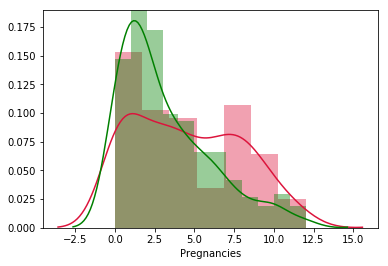

In [14]:
diabetics = df[df['Outcome'] == 1]
control = df[df['Outcome'] == 0]

sns.distplot(diabetics['Pregnancies'], color='crimson')
sns.distplot(control['Pregnancies'], color='g')

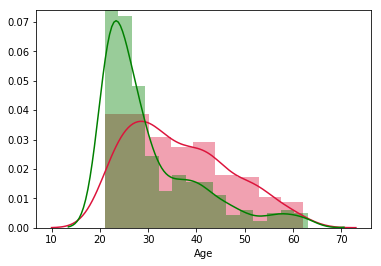

In [15]:
diabetics = df[df['Outcome'] == 1]
control = df[df['Outcome'] == 0]

sns.distplot(diabetics['Age'], color='crimson')
sns.distplot(control['Age'], color='green')

## Modeling

* Random 

In [16]:
# Create subsets train & test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

print (df.shape, train.shape, test.shape)

# # Insert the code to separate into the following outcomes.

x_train = train.drop('Outcome', axis=1)
y_train = train['Outcome'] 

x_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

(737, 7) (589, 7) (148, 7)


### First Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(x_train, y_train)

print ("\n\n\n")
print ("### Decision Tree ###")
print ("Training set score: ", tree.score(x_train, y_train))
print ("Testing set score: ", tree.score(x_test, y_test))





### Decision Tree ###
Training set score:  0.8607809847198642
Testing set score:  0.7905405405405406


In [25]:
depths = range(1,5)
for depth in depths:
  tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
  tree.fit(x_train, y_train)

  print ("\n\n\n")
  print ("### Decision Tree ###")
  print ('Tree Depth:', depth)
  print ("Training set score: ", tree.score(x_train, y_train))
  print ("Testing set score: ", tree.score(x_test, y_test))





### Decision Tree ###
Tree Depth: 1
Training set score:  0.7419354838709677
Testing set score:  0.7364864864864865




### Decision Tree ###
Tree Depth: 2
Training set score:  0.769100169779287
Testing set score:  0.777027027027027




### Decision Tree ###
Tree Depth: 3
Training set score:  0.7792869269949066
Testing set score:  0.7837837837837838




### Decision Tree ###
Tree Depth: 4
Training set score:  0.8047538200339559
Testing set score:  0.7162162162162162


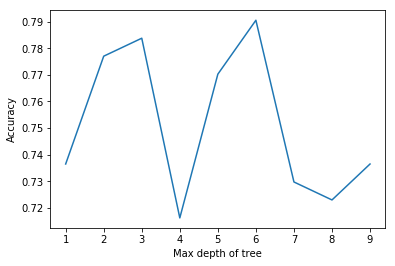

In [34]:
model_accuracy = []

depths = range(1,10)
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(x_train, y_train)
    model_accuracy.append(tree.score(x_test, y_test))

plt.plot(depths, model_accuracy)
# plt.title("Accuracy is optimized near n=4")
plt.ylabel("Accuracy")
plt.xlabel("Max depth of tree")
# plt.axvline(4, color='r')
plt.show()

In [38]:
### Random Forests (a Decision Tree Ensemble Method)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=0)
rf.fit(x_train, y_train)

print ("\n\n\n")
print ("### Random Forests ###")
print ("Training set score: ", rf.score(x_train, y_train))
print ("Testing set score: ", rf.score(x_test, y_test))





### Random Forests ###
Training set score:  0.9762308998302207
Testing set score:  0.8513513513513513


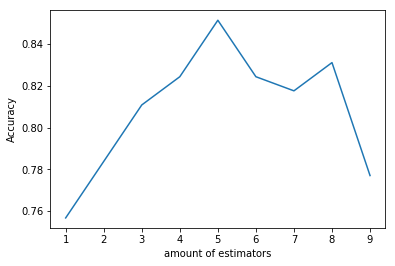

In [37]:
#Random Forest Optimizer
randforest_accuracy = []

randoms = range(1,10)
for random in randoms:
  rf = RandomForestClassifier(n_estimators=random, random_state=0)
  rf.fit(x_train, y_train)
  randforest_accuracy.append(rf.score(x_test, y_test)
                       )
plt.plot(randoms,randforest_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("amount of estimators")
plt.show() 